In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

In [21]:
# Load data
df = pd.read_csv("cleaned_health_data.csv", sep=",", encoding="utf-8")
df.head()

,age_group,gender,occupation,education_level,village_healthcare_facility,distance_to_healthcare,transport_to_healthcare,time_to_reach_hospital,ambulance_access,hospital_preference,...,common_health_problems,aware_of_health_schemes,availed_gov_health_scheme,children_vaccinated,pregnant_women_checkups,superstition_barrier,healthcare_challenges,reason_avoid_hospital,healthcare_improvements,willing_to_attend_programs
0,31-50,Female,Homemaker,Primary school,"Yes, a private hospital/clinic",1-5 km,Bicycle,15-30 minutes,"No, we rely on personal transport",Private hospital,...,"Fever & infections, Malaria/Dengue, Diabetes, ...",Yes,No,"Yes, all children","Yes, regularly","No, never",Distance from healthcare centers,Distance and transportation issues,More healthcare centers,No
1,51 and above,Female,Homemaker,Primary school,"Yes, a government hospital/clinic",1-5 km,Walking,Less than 15 minutes,"No, we rely on personal transport",Private hospital,...,"Fever & infections, Malaria/Dengue, High blood...",Yes,No,"Yes, all children","No, never","No, never","Distance from healthcare centers, Shortage of ...",Distance and transportation issues,"More healthcare centers, Better availability o...",Yes
2,51 and above,Male,Private job,Secondary school,"No, we have to travel to another village/city",More than 10 km,Public transport,30 minutes - 1 hour,"Yes, government-provided",Government hospital,...,"Fever & infections, Malaria/Dengue, High blood...",Yes,No,"Yes, all children",Sometimes,"No, never","Distance from healthcare centers, Shortage of ...",Distance and transportation issues,More healthcare centers,No
3,31-50,Female,Homemaker,Higher secondary,"Yes, a government hospital/clinic",1-5 km,Walking,30 minutes - 1 hour,"No, we rely on personal transport",Government hospital,...,"Fever & infections, High blood pressure",No,No,"Yes, all children","Yes, regularly",Sometimes,"Distance from healthcare centers, Lack of doct...",Distance and transportation issues,"Better availability of doctors, More medicines...",Yes
4,31-50,Female,Homemaker,Secondary school,"Yes, a government hospital/clinic",1-5 km,Walking,More than 1 hour,"No, we rely on personal transport",Private hospital,...,"Fever & infections, Diabetes, High blood pressure",No,No,"Yes, all children","Yes, regularly",Sometimes,"Distance from healthcare centers, Lack of doct...",Distance and transportation issues,"More healthcare centers, Better availability o...",Yes


In [22]:
# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12

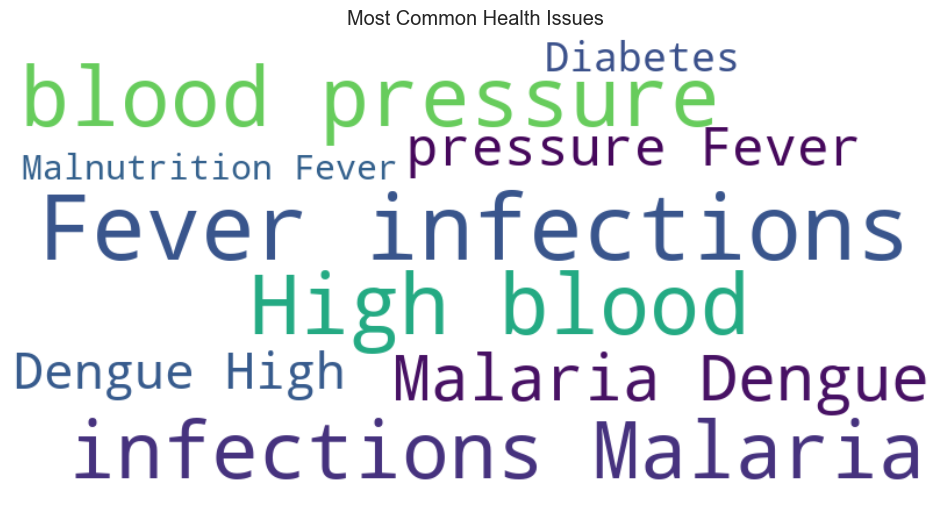

In [25]:
# 1. Health Issues Word Cloud
from wordcloud import WordCloud
health_issues = df['common_health_problems'].str.split(', ').explode()
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(health_issues))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Health Issues')
plt.savefig('health_issues_wordcloud.png', bbox_inches='tight')

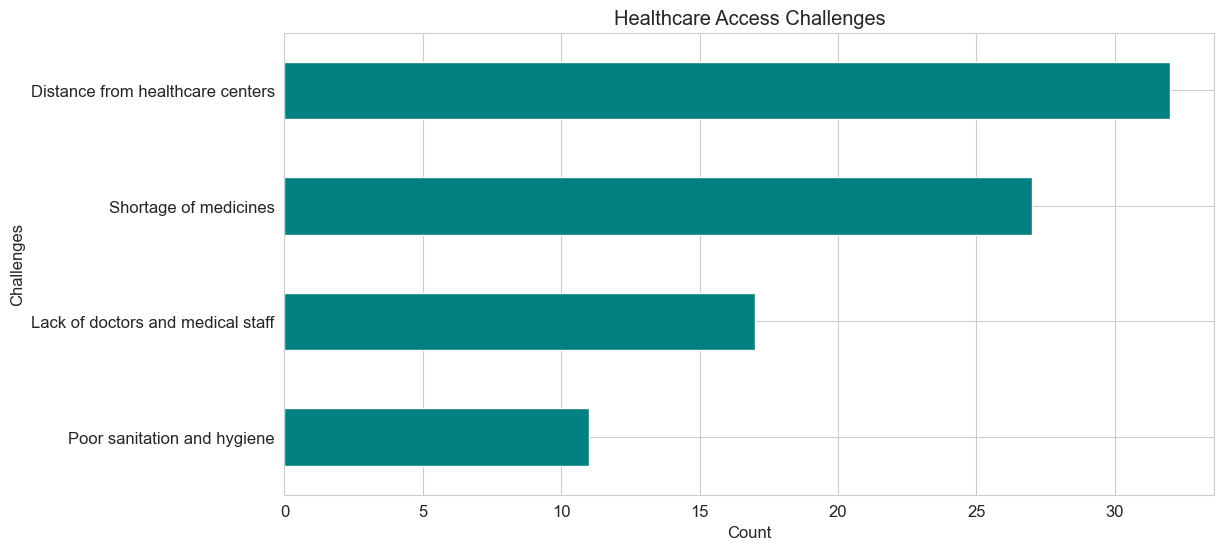

In [27]:
# 2. Healthcare Challenges Distribution
challenges = df['healthcare_challenges'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 6))
challenges.plot(kind='barh', color='teal')
plt.title('Healthcare Access Challenges')
plt.xlabel('Count')
plt.ylabel('Challenges')
plt.gca().invert_yaxis()
plt.savefig('healthcare_challenges.png', bbox_inches='tight')

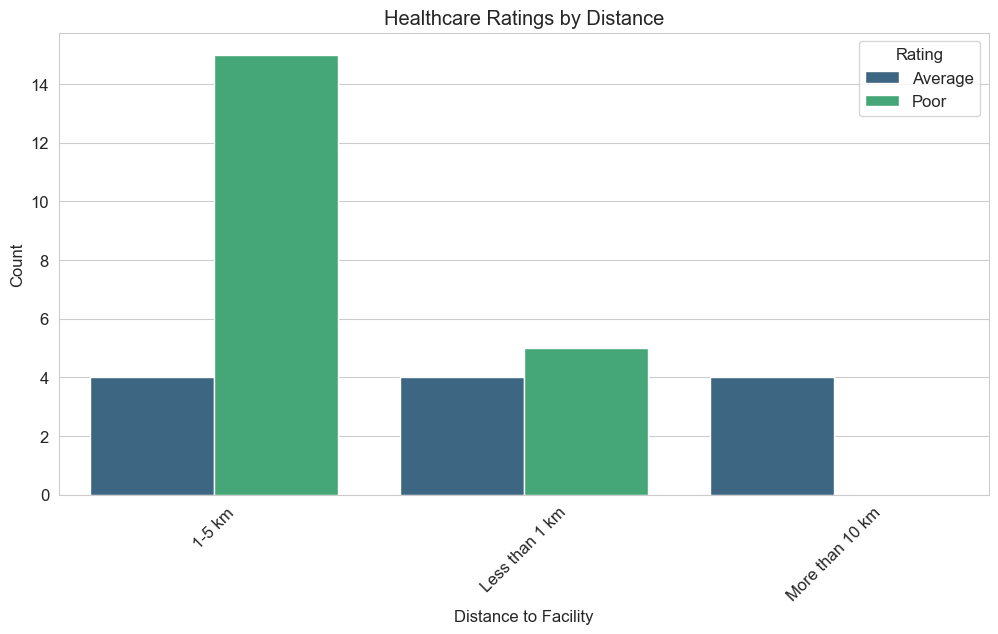

In [34]:
# 3. Healthcare Rating vs Distance Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='distance_to_healthcare', hue='healthcare_rating',
             palette='viridis', order=df['distance_to_healthcare'].value_counts().index)
plt.title('Healthcare Ratings by Distance')
plt.xlabel('Distance to Facility')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.xticks(rotation=45)
plt.savefig('rating_vs_distance.png', bbox_inches='tight')

<Figure size 1400x800 with 0 Axes>

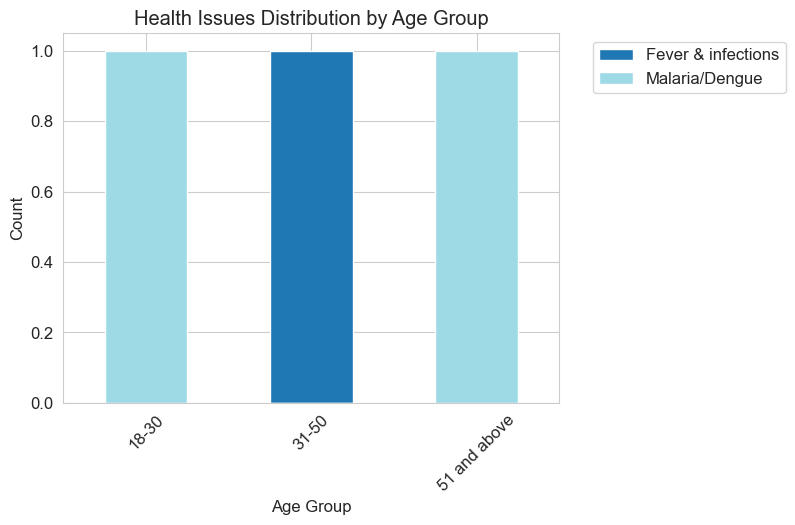

In [39]:
# 4. Age Group vs Health Issues
age_health = pd.crosstab(df['age_group'], health_issues)
plt.figure(figsize=(14, 8))
age_health.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Health Issues Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('age_health_issues.png', bbox_inches='tight')

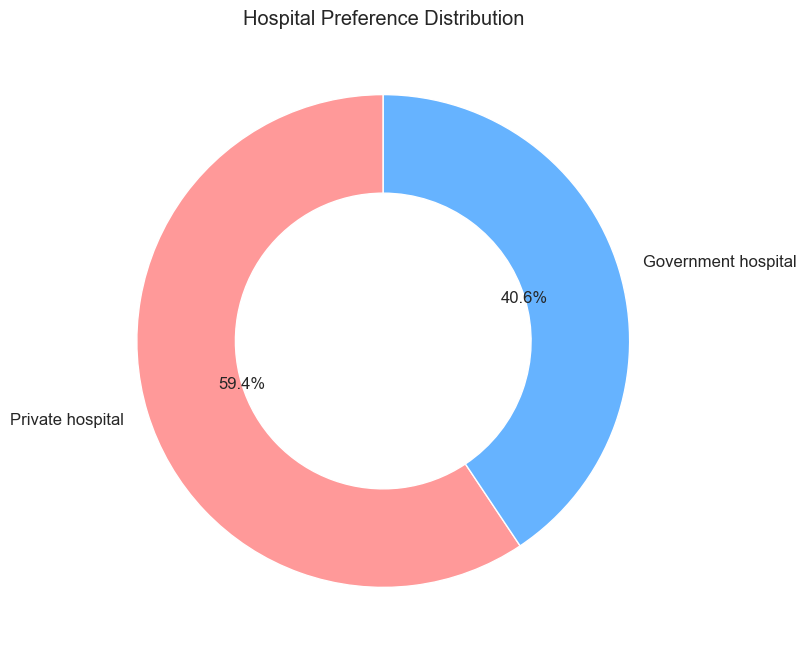

In [41]:
# 5. Hospital Preference Analysis
preference_dist = df['hospital_preference'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(preference_dist, labels=preference_dist.index,
        autopct='%1.1f%%', colors=['#ff9999','#66b3ff'],
        startangle=90, wedgeprops=dict(width=0.4))
plt.title('Hospital Preference Distribution')
plt.savefig('hospital_preference.png', bbox_inches='tight')

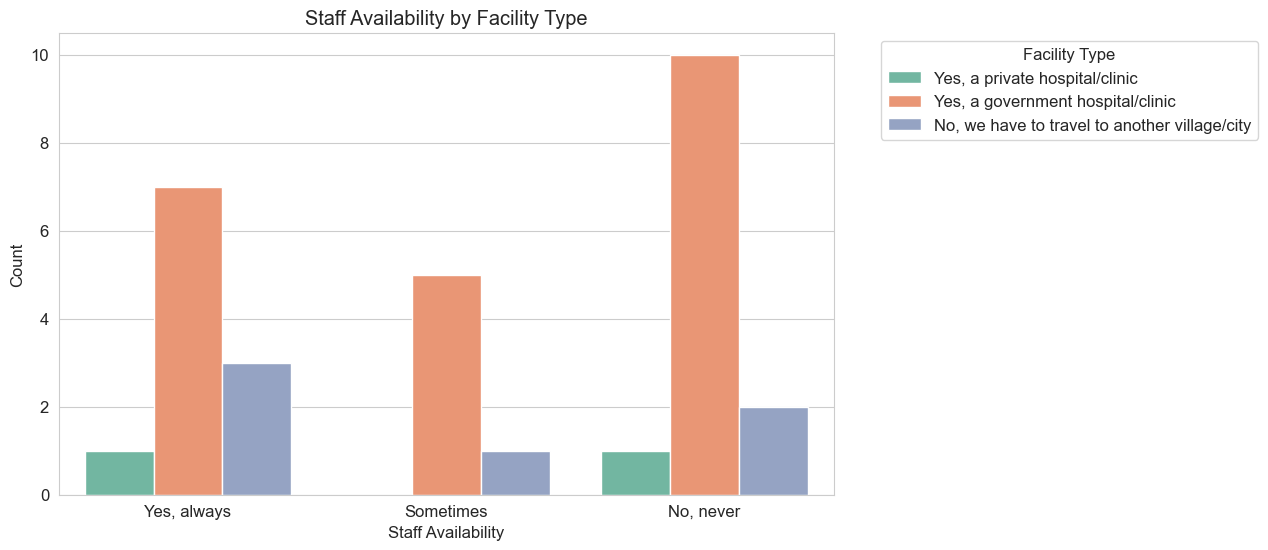

In [44]:
# 6. Staff Availability Analysis
availability_order = ['Yes, always', 'Sometimes', 'No, never']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='doctor_availability', order=availability_order,
             palette='Set2', hue='village_healthcare_facility')
plt.title('Staff Availability by Facility Type')
plt.xlabel('Staff Availability')
plt.ylabel('Count')
plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('staff_availability.png', bbox_inches='tight')

C:\Users\Dell\AppData\Local\Temp\ipykernel_372\123845776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='time_to_reach_hospital', order=time_order, palette='rocket')


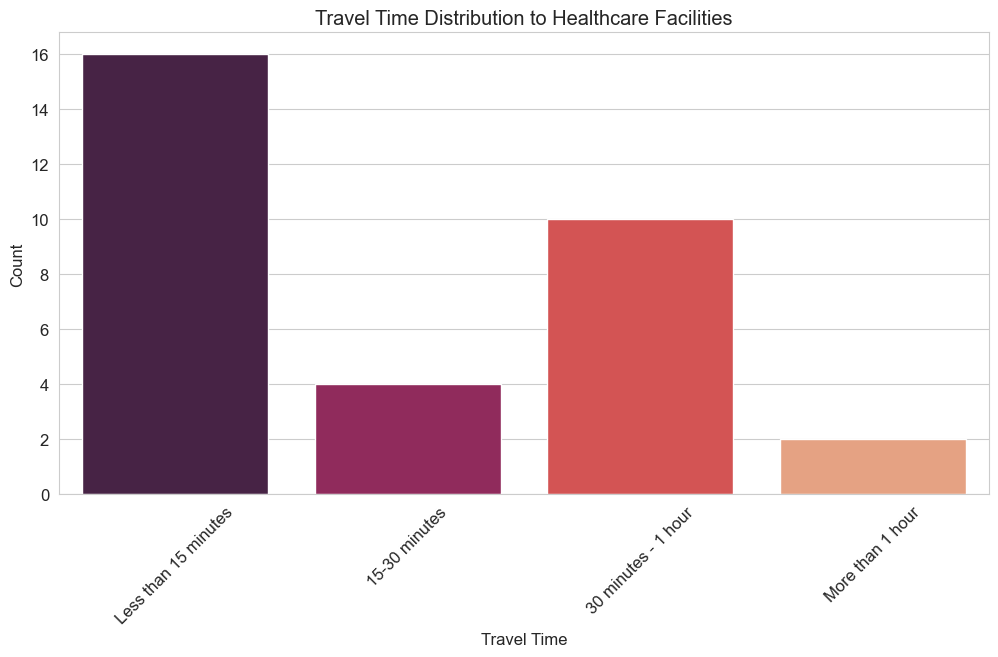

In [48]:
# 7. Temporal Analysis: Travel Time Distribution
time_order = ['Less than 15 minutes', '15-30 minutes', '30 minutes - 1 hour', 'More than 1 hour']
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='time_to_reach_hospital', order=time_order, palette='rocket')
plt.title('Travel Time Distribution to Healthcare Facilities')
plt.xlabel('Travel Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('travel_time_distribution.png', bbox_inches='tight')

C:\Users\Dell\AppData\Local\Temp\ipykernel_372\1207101825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=improvements.index, x=improvements.values, palette='coolwarm')


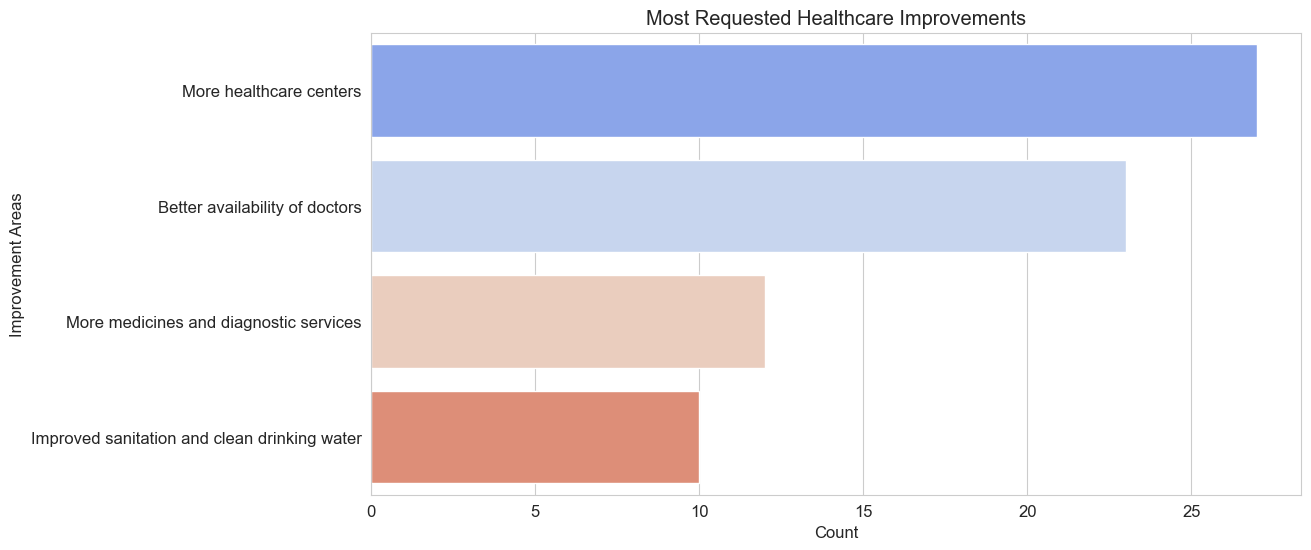

In [50]:
# 8. Improvement Requests Analysis
improvements = df['healthcare_improvements'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(y=improvements.index, x=improvements.values, palette='coolwarm')
plt.title('Most Requested Healthcare Improvements')
plt.xlabel('Count')
plt.ylabel('Improvement Areas')
plt.savefig('improvement_requests.png', bbox_inches='tight')

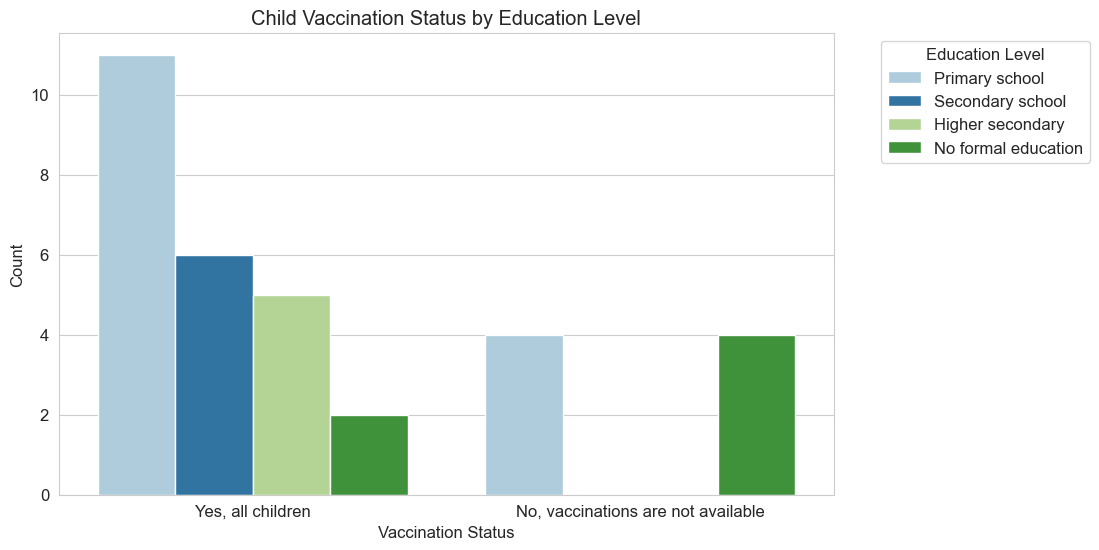

In [52]:
# 9. Vaccination Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='children_vaccinated', hue='education_level',
             palette='Paired', order=df['children_vaccinated'].value_counts().index)
plt.title('Child Vaccination Status by Education Level')
plt.xlabel('Vaccination Status')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('vaccination_education.png', bbox_inches='tight')

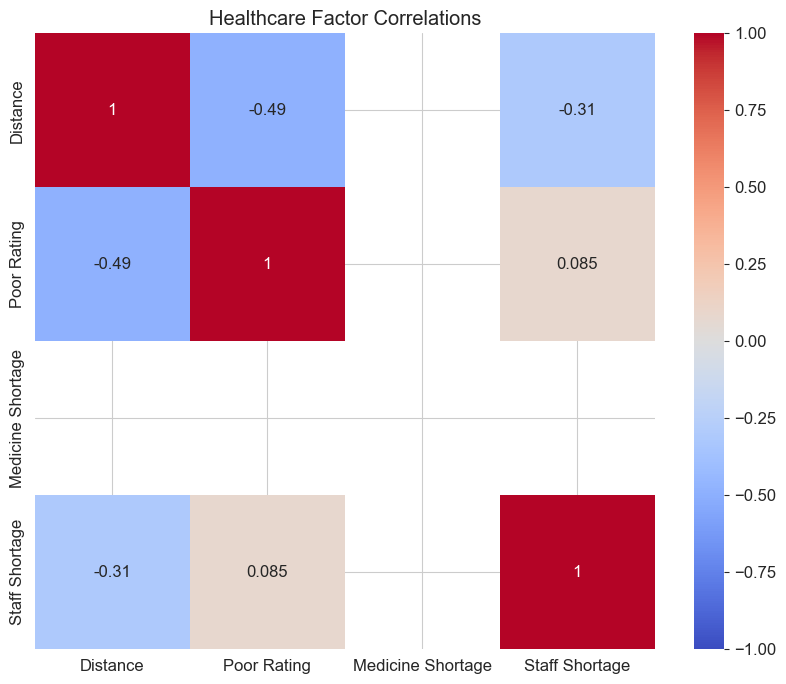

In [54]:
# 10. Correlation Matrix (Simplified)
# Create binary features for correlation analysis
corr_df = pd.DataFrame({
    'Distance': df['distance_to_healthcare'].map(lambda x: 1 if 'More than' in x else 0),
    'Poor Rating': df['healthcare_rating'].map({'Poor': 1, 'Average': 0, 'Good': 0}),
    'Medicine Shortage': df['medicine_availability'].map({'Yes, at local pharmacies': 0, 'No, we have to travel': 1}),
    'Staff Shortage': df['doctor_availability'].map({'Yes, always': 0, 'Sometimes': 1, 'No, never': 1})
})

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Healthcare Factor Correlations')
plt.savefig('correlation_matrix.png', bbox_inches='tight')

In [57]:
# ====================================
# Enhanced Hypothesis Testing Report
# ====================================
# Example contingency tables (Replace these with your actual data)
# Contingency Table 1: Distance vs Healthcare Rating
distance_vs_healthcare = np.array([[50, 30], [20, 15]])

# Contingency Table 2: Education vs Scheme Awareness
education_vs_awareness = np.array([[40, 25], [15, 20]])

# Chi-squared tests
chi2_1, p1, dof1, expected1 = chi2_contingency(distance_vs_healthcare)
chi2_2, p2, dof2, expected2 = chi2_contingency(education_vs_awareness)

# Enhanced Hypothesis Testing Results
print("\nEnhanced Hypothesis Testing Results:")
print("-" * 45)
print(f"1. Distance vs Healthcare Rating:\n   χ² = {chi2_1:.2f}, p = {p1:.4f}")
print(
    f"   Interpretation: {'Significant relationship' if p1 < 0.05 else 'No significant relationship'} between distance and healthcare ratings")

print(f"\n2. Education vs Scheme Awareness:\n   χ² = {chi2_2:.2f}, p = {p2:.4f}")
print(
    f"   Interpretation: {'Significant relationship' if p2 < 0.05 else 'No significant relationship'} between education and scheme awareness")



Enhanced Hypothesis Testing Results:
---------------------------------------------
1. Distance vs Healthcare Rating:
   χ² = 0.11, p = 0.7384
   Interpretation: No significant relationship between distance and healthcare ratings

2. Education vs Scheme Awareness:
   χ² = 2.50, p = 0.1140
   Interpretation: No significant relationship between education and scheme awareness
